# RNN Text: Tweet Classification
**OPIM 5509: Introduction to Deep Learning - University of Connecticut**

Full Name: Zihao Yan

Student ID (7 digit number): 2865415

-----------------------------------------------
As we learned text classification, you may be interested in classifying a real-world problem.
For your assignment, you are provided with a function to scrape tweets of certain users on Twitter. Use the function to scrape 2000 tweets for any two people you are interested in. Then save these tweets to your own drive as text files with two folders.

The rubric is shown below. 

## Rubric
**Part I: Data Preparation ( 35 points)**
* (5 points) Write a few lines about the two people/organizations you are going to scrape. Why are they of interest to you? Why should they be of interest to me?
* (10 points) Use the function to scrape 2000 tweets from each person/organization and save to your drive.
* (5 points) Load the data from your drive. 
* (15 points) Tokenize, pad the sequences and split data to training and validation. 
    * Make a shareable link clearly displayed at the top of your script so we can review your data, otherwise, no credit for this section. 

**Part II: Modeling (45 points)**
* (30 points) Fit three models with different architectures of varying complexity. Please have nice organized headers so I can grade it easily. You can do:
  * LSTM, GRU or SimpleRNN
  * Bidirectional LSTM or GRU
  * 1D Conv and Pooling
  * Pre-loaded word embeddings (i.e. GLOVE)
  * All of the above with stacked layers etc.

* (15 points) For each model you built, make a confusion matrix with report (like this: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

**Tip:** You may get bad accuracy, also try to change the max length and most common words, this can make a difference sometimes. Do not worry about accuracy from the first model, just try to improve it in subsequent models. I am judging your code and logic not accuracy - it’s possible you can’t predict it!

**Part III: Analysis (20 points)**
* Write five to ten bullets to compare your results and discuss how you improve the models by changing the architectures.


In [ ]:
# good luck!

**The tweets that I scraped are in [Bill Gates](https://drive.google.com/drive/folders/1DR_TeC7dntuYWkSIcJzgDL_vEgIdUo9H?usp=sharing) and [Elon Musk](https://drive.google.com/drive/folders/15xY3xC-ROp_e5R720kg4vNOE_jt7ivE3?usp=sharing)**. This is the [home folder](https://drive.google.com/drive/folders/19Zk7Lv61wB8gQDhN7EMCuVY2dpWwLqQ9?usp=sharing) for these two datasets.(Don't forget the PERMISSION)

## Part I: Data Preparation

### 1.Scrapped People: Bill Gates and Elon Musk

In this project I want to figure out what are the most important things for a greatest entrepreneur in the world focusing through their life. 

On Nov, 16th, S&P Dow Jones Indices announced that Tesla will join the S&P 500 effective prior to trading on Dec, 21th. Bill Gates founded the Microsoft and Elon Musk founded Tesla, Paypal, and SpaceX. These are all great companies, not only the creation of value, but also the vision of human being. I wish to explore more information from these two people to facilitate Dr.Dave's potential for a future entrepreneur. :)


### 2.Scrape Tweets
(for preview, no need to run this section)

In [ ]:
# use snscrape to scrape tweets
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import csv

In [ ]:
# mount your drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#### 2.1 Store Bill Gates's Tweets

In [ ]:
# make a folder to store Bill Gates's data
base_dir = '/content/drive/MyDrive/Datasets/OPIM 5509 Deep Learning/Module5_Recurrent_Neural_Networks_for_Text_Sequences/Tweets_Data'

import tensorflow as tf

#Create a new directory (a folder) in your Drive
tf.io.gfile.mkdir(base_dir)

#Combine the 2 strings
gates_dir = base_dir + '/Bill Gates/'

#Create the second directory
tf.io.gfile.mkdir(gates_dir)

In [ ]:
maxTweets = 2100

# make sure you update the username and number of tweets!
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@billgates + since:1996-12-02 until:2020-11-05-filter:links -filter:replies').get_items()):
  csvFile = open(gates_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])

  if i > maxTweets :
    break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
csvFile.close()

In [ ]:
#Load the data you just saved from your drive
import pandas as pd
import glob

gates_path = '/content/drive/MyDrive/Datasets/OPIM 5509 Deep Learning/Module5_Recurrent_Neural_Networks_for_Text_Sequences/Tweets_Data/Bill Gates/' # use your path
gates_all_files = glob.glob(gates_path + "/*.csv")

li = []

for filename in gates_all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

gates_tweets = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
gates_tweets

,id,date,tweet
0,774016644880359425,2016-09-08 22:48:43+00:00,"Since 2002, Canadians have helped save 20M liv..."
1,773560866750992384,2016-09-07 16:37:37+00:00,These young innovators are driving astounding ...
2,773188644014350336,2016-09-06 15:58:32+00:00,This imaging technique could make it easier fo...
3,772485358240010240,2016-09-04 17:23:56+00:00,Safe drinking water is often a matter of life ...
4,772083362433474560,2016-09-03 14:46:32+00:00,Nate Bowling is committed to making his classr...
...,...,...,...
2096,1223295181635510272,2020-01-31 17:21:13+00:00,"Thank you, Sue, for all of your contributions ..."
2097,1223031839717117954,2020-01-30 23:54:48+00:00,Game on! https://t.co/fhOOsAvqdc
2098,1222982945704640513,2020-01-30 20:40:30+00:00,If the world keeps up the fight against these ...
2099,1222607474336858112,2020-01-29 19:48:31+00:00,The world has only begun to tap into all the w...


#### 2.2 Bill Gates's Tweets EDA

In [ ]:
# import NLP modules
import nltk
# define some stop words
from nltk.corpus import stopwords
nltk.download('stopwords') # this makes sure these are downloaded if you haven't already!
# print(stopwords.words('english'))
stop = stopwords.words('english') # see why it's important to turn everything lower case? all of your stopwords are!

# lowercase
# make everything lowercase
gates_tweets['tweet'] = gates_tweets['tweet'].str.lower()
# remove funky characters
gates_tweets['tweet'] = gates_tweets['tweet'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
# remove stop words
gates_tweets['tweet'] = gates_tweets['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
# common words to make a frequency plot 
# we'll group, then convert to pandas DataFrame for easy plotting
x = gates_tweets['tweet'].str.split(expand=True).stack().value_counts()
x = pd.DataFrame(x)
# reset the index
x.reset_index(inplace=True)
# rename the columns
x.rename(columns={x.columns[0]:'word', x.columns[1]:'frequency'}, inplace=True)
x

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,word,frequency
0,one,228
1,people,199
2,world,195
3,im,192
4,great,168


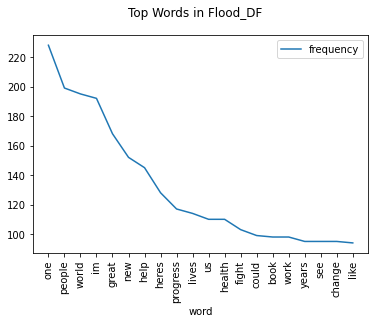

In [ ]:
import matplotlib.pyplot as plt
# common words as a plot
# Frequency Distribution Plot
# look at first X words

# len(x) just the number of rows

x = x[0:20] # wanna play? change the 20 to 10 or 30 and see what happens...
            # you need to run the previous cell first
x.plot(x='word', y='frequency')
plt.xticks(np.arange(len(x)), x['word'], rotation=90)
plt.suptitle('Top Words in Flood_DF')
plt.show()

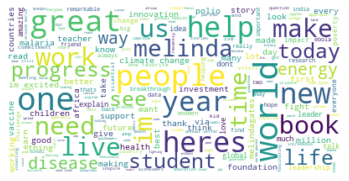

In [ ]:
# word cloud
# https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py

from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(gates_tweets['tweet'])) # just update the column name!

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(background_color ='white', 
                      max_font_size=40).generate(' '.join(gates_tweets['tweet'])) # just update the column name!
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

From the frequency table and world cloud we can observed, Bill Gates usually talks about people and world. His wife Mrs. Melinda Gates also appears in the world cloud. 

We scraped 2101 rows for Bill Gates. But these are csv files, we need to convert them into txt files.

#### 2.3 Convert Bill Gates's Tweets into TXT File

In [ ]:
i = 0 
for row in gates_tweets.tweet: 
  fh = open('/content/drive/MyDrive/Datasets/OPIM 5509 Deep Learning/Module5_Recurrent_Neural_Networks_for_Text_Sequences/Tweets/Bill Gates/{}.txt'.format(i),'w')
  fh.write(row)
  fh.close()
  i+=1

#### 2.4 Store Elon Musk's Tweets

In [ ]:
# make a folder to store data
base_dir = '/content/drive/MyDrive/Datasets/OPIM 5509 Deep Learning/Module5_Recurrent_Neural_Networks_for_Text_Sequences/Tweets_Data'

import tensorflow as tf

#Create a new directory (a folder) in your Drive
tf.io.gfile.mkdir(base_dir)

#Combine the 2 strings
musk_dir = base_dir + '/Elon Musk/'

#Create the second directory
tf.io.gfile.mkdir(musk_dir)

In [ ]:
maxTweets = 2100

# make sure you update the username and number of tweets!
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@elonmusk + since:1996-12-02 until:2020-11-05-filter:links -filter:replies').get_items()):
  csvFile = open(musk_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])

  if i > maxTweets :
    break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
csvFile.close()

In [ ]:
#Load the data you just saved from your drive
import pandas as pd
import glob

musk_path = '/content/drive/MyDrive/Datasets/OPIM 5509 Deep Learning/Module5_Recurrent_Neural_Networks_for_Text_Sequences/Tweets_Data/Elon Musk/' # use your path
musk_all_files = glob.glob(musk_path + "/*.csv")

li = []

for filename in musk_all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

musk_tweets = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
musk_tweets

,id,date,tweet
0,999364333674024960,2018-05-23 18:59:59+00:00,problem journos constant pressure get max clic...
1,999355619390865408,2018-05-23 18:25:21+00:00,holierthanthou hypocrisy big media companies l...
2,998988641702526977,2018-05-22 18:07:07+00:00,going include fun games hidden easter eggs tes...
3,998786412970369024,2018-05-22 04:43:32+00:00,wanted say thanks tesla supporters damn well love
4,998409778316496896,2018-05-21 03:46:55+00:00,spacex crew dragon ship anechoic chamber emi t...
...,...,...,...
2096,1288925451902054400,2020-07-30 19:52:29+00:00,total eclipse heart httpstcondjdlknbe
2097,1288751116562206720,2020-07-30 08:19:44+00:00,losing ithttpstcohoyldzg
2098,1288744630788304897,2020-07-30 07:53:58+00:00,sure could use good ravewhats favorite techno
2099,1288734164485898240,2020-07-30 07:12:22+00:00,died arms tonight


#### 2.5 Elon Musk's Tweets EDA

In [ ]:
# lowercase
# make everything lowercase
musk_tweets['tweet'] = musk_tweets['tweet'].str.lower()
# remove funky characters
musk_tweets['tweet'] = musk_tweets['tweet'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
# remove stop words
musk_tweets['tweet'] = musk_tweets['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
# common words to make a frequency plot 
# we'll group, then convert to pandas DataFrame for easy plotting
x = musk_tweets['tweet'].str.split(expand=True).stack().value_counts()
x = pd.DataFrame(x)
# reset the index
x.reset_index(inplace=True)
# rename the columns
x.rename(columns={x.columns[0]:'word', x.columns[1]:'frequency'}, inplace=True)
x.head()

,word,frequency
0,tesla,368
1,amp,276
2,model,141
3,spacex,91
4,falcon,84


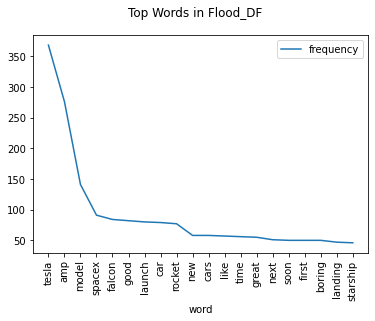

In [ ]:
# common words as a plot
# Frequency Distribution Plot
# look at first X words

# len(x) just the number of rows

x = x[0:20] # wanna play? change the 20 to 10 or 30 and see what happens...
            # you need to run the previous cell first
x.plot(x='word', y='frequency')
plt.xticks(np.arange(len(x)), x['word'], rotation=90)
plt.suptitle('Top Words in Flood_DF')
plt.show()

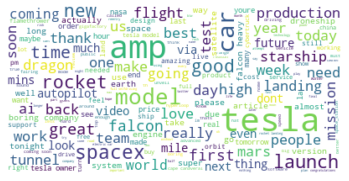

In [ ]:
# word cloud
# https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py

from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(musk_tweets['tweet'])) # just update the column name!

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(background_color ='white', 
                      max_font_size=40).generate(' '.join(musk_tweets['tweet'])) # just update the column name!
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Wow! Comparing with Bill Gates, Elon Musk often talks about his companies, Tesla and SpaceX. Other high frequency words like car, rocket falcon(which I think is Falcon 9 rocket), AI are also included in his topics. 

We scraped 2101 rows for Elon Musk. But these are csv files, we need to convert them into txt files.

#### 2.6 Convert Elon Musk's Tweets into TXT File

In [ ]:
i = 0 
for row in musk_tweets.tweet: 
  fh = open('/content/drive/MyDrive/Datasets/OPIM 5509 Deep Learning/Module5_Recurrent_Neural_Networks_for_Text_Sequences/Tweets/Elon Musk/{}.txt'.format(i),'w')
  fh.write(row)
  fh.close()
  i+=1

### 3.Load Data
This section will use the scraped tweets that I listed at the beginning of the script. For convenience, I also posted here: [Bill Gates](https://drive.google.com/drive/folders/1DR_TeC7dntuYWkSIcJzgDL_vEgIdUo9H?usp=sharing) and [Elon Musk](https://drive.google.com/drive/folders/15xY3xC-ROp_e5R720kg4vNOE_jt7ivE3?usp=sharing).

In [ ]:
#Load the data you just saved from your drive
import os

my_dir = '/content/drive/MyDrive/Datasets/OPIM 5509 Deep Learning/Module5_Recurrent_Neural_Networks_for_Text_Sequences/Tweets/'

labels = []
texts = []
count = 0
for label_type in ['Bill Gates/', 'Elon Musk/']:
    dir_name = os.path.join(my_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            count = count + 1
            print(count)
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'Bill Gates/':
                labels.append(0)
            else:
                labels.append(1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


All these 4202(2101 for each person) tweets are loaded successfully!

### 4.Tokenize, Pad the Sequences and Split Data to Training and Validation Dataset.

In [ ]:
# Tokenize, pad and prepare training and validation data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # cut texts after this number of words (among top max_words most common words)
validation_samples = 1000  # We will be validating on 1000 samples
max_words = 1000  # We will only consider the top 1000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)

# fit_on_texts means it learns the indices of the words
tokenizer.fit_on_texts(texts)

# the sequences are comprised of those indices
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# in case of low word counts, we need to pad sequences
# so that they are uniform length
# https://blog.csdn.net/wcy23580/article/details/84957471
data = pad_sequences(sequences, maxlen=maxlen)

# our labels, which were previously stored as a list [],
# are now converted to a numpy array for modeling
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 13183 unique tokens.
Shape of data tensor: (4202, 100)
Shape of label tensor: (4202,)


In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

training_samples = 3202  # We will be training on 3202 samples

x_train = data[:training_samples] # from 0 to training samples
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [ ]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(3202, 100) (3202,)
(1000, 100) (1000,)


## Part II: Modeling

### 1.Simple Architecture(Bidirectional LSTM)
Because Bidirectional can learn the forward and backward sequences for the text, I choose bidirectional LSTM to be the simplest model architecture.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, GRU, Flatten, Conv1D, MaxPool1D, Bidirectional, Dropout

model1 = Sequential()
model1.add(Embedding(max_words, 128, input_length=maxlen))
model1.add(Bidirectional(LSTM(64)))
model1.add(Flatten())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=10,
                    validation_data=(x_val, y_val))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 100, 128)          128000    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 128)               98816     
_________________________________________________________________
flatten_12 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
Total params: 230,977
Trainable params: 230,977
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
321/321 [==============================] - 30s 94ms/step - loss: 0.2131 - acc: 0.9085 - val_loss: 0.09

#### 1.1 Performance Plot

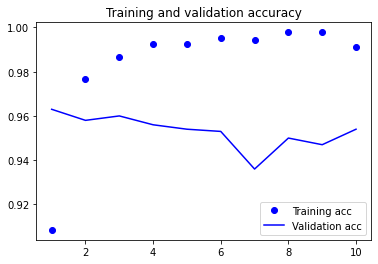

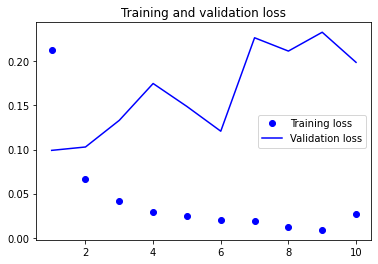

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 1.2 Confusion Matrix and Classification Report

In [ ]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    from sklearn.metrics import roc_curve
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [ ]:
class_train_preds = model1.predict(x_train)
threshold = Find_Optimal_Cutoff(y_train, class_train_preds)

bidirectional_LSTM_prob = model1.predict_proba(x_val)

In [ ]:
i=0  
bidirectional_LSTM_preds_class =np.empty(bidirectional_LSTM_prob.shape)
while i < len(bidirectional_LSTM_prob):
    if(bidirectional_LSTM_prob[i]<=threshold):
        bidirectional_LSTM_preds_class[i]=0
    else:
        bidirectional_LSTM_preds_class[i]=1
    i+=1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('the classification Report for LSTM model is:')
print(classification_report(y_val, bidirectional_LSTM_preds_class ))
print('the confusion matrix for LSTM model is:' )
print(confusion_matrix(y_val, bidirectional_LSTM_preds_class))

the classification Report for LSTM model is:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       496
           1       0.96      0.95      0.95       504

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

the confusion matrix for LSTM model is:
[[475  21]
 [ 25 479]]


### 2.Add all Stacked Layers

Conv1D, MaxPool1D, Bidirecitonal LSTM, GRU, Dropout

In [ ]:
# define model
model2 = Sequential()
model2.add(Embedding(max_words, 128, input_length=maxlen))
model2.add(Conv1D(filters=128, kernel_size=3))
model2.add(MaxPool1D(2))
model2.add(Bidirectional(LSTM(64,
                            return_sequences=True, # remember, if stacking layers, you need to return sequences!
                            activation='relu',
                            recurrent_dropout=0.2)))
model2.add(Dropout(0.3))
model2.add(GRU(32, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 100, 128)          128000    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 98, 128)           49280     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 49, 128)           0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 49, 128)           98816     
_________________________________________________________________
dropout_10 (Dropout)         (None, 49, 128)           0         
_________________________________________________________________
gru_5 (GRU)                  (None, 32)                15552     
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)              

In [ ]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
321/321 [==============================] - 45s 142ms/step - loss: 7.2034 - acc: 0.8588 - val_loss: 0.1376 - val_acc: 0.9490
Epoch 2/10
321/321 [==============================] - 45s 141ms/step - loss: 0.1144 - acc: 0.9666 - val_loss: 0.1235 - val_acc: 0.9570
Epoch 3/10
321/321 [==============================] - 45s 139ms/step - loss: 0.0563 - acc: 0.9872 - val_loss: 0.2820 - val_acc: 0.9480
Epoch 4/10
321/321 [==============================] - 44s 139ms/step - loss: 0.0401 - acc: 0.9913 - val_loss: 0.2357 - val_acc: 0.9490
Epoch 5/10
321/321 [==============================] - 44s 139ms/step - loss: 0.0373 - acc: 0.9931 - val_loss: 0.1992 - val_acc: 0.9450
Epoch 6/10
321/321 [==============================] - 45s 139ms/step - loss: 0.0241 - acc: 0.9947 - val_loss: 0.2198 - val_acc: 0.9460
Epoch 7/10
321/321 [==============================] - 44s 139ms/step - loss: 0.0261 - acc: 0.9950 - val_loss: 0.2171 - val_acc: 0.9490
Epoch 8/10
321/321 [==============================] - 4

#### 2.1 Performance Plot

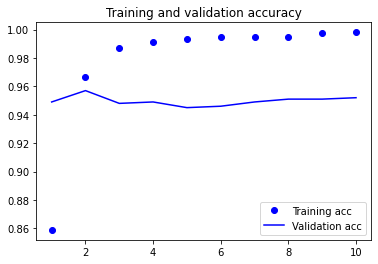

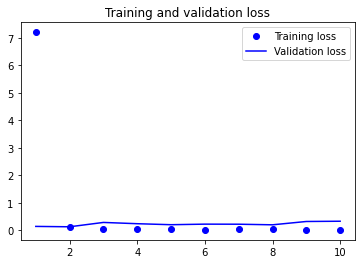

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 2.2 Confusion Matrix and Classification Report

In [ ]:
class_train_preds = model2.predict(x_train)
threshold = Find_Optimal_Cutoff(y_train, class_train_preds)

all_stacked_prob = model.predict_proba(x_val)

In [ ]:
i=0  
all_stacked_preds_class =np.empty(all_stacked_prob.shape)
while i < len(all_stacked_prob):
    if(all_stacked_prob[i]<=threshold):
        all_stacked_preds_class[i]=0
    else:
        all_stacked_preds_class[i]=1
    i+=1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('the classification Report for LSTM model is:')
print(classification_report(y_val, all_stacked_preds_class ))
print('the confusion matrix for LSTM model is:' )
print(confusion_matrix(y_val, all_stacked_preds_class))

the classification Report for LSTM model is:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       496
           1       0.99      0.98      0.99       504

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

the confusion matrix for LSTM model is:
[[493   3]
 [ 11 493]]


### 3.Bidirectional LSTM with pre-trained word embeddings

Conv1D, MaxPool1D, Bidirecitonal LSTM, GRU, Dropout with pre-computed embeddings.

#### 3.1 Reload the Data

In [ ]:
#Load the data you just saved from your drive
import os

my_dir = '/content/drive/MyDrive/Datasets/OPIM 5509 Deep Learning/Module5_Recurrent_Neural_Networks_for_Text_Sequences/Tweets/'

labels = []
texts = []
count = 0
for label_type in ['Bill Gates/', 'Elon Musk/']:
    dir_name = os.path.join(my_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            count = count + 1
            print(count)
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'Bill Gates/':
                labels.append(0)
            else:
                labels.append(1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
# Tokenize, pad and prepare training and validation data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # # cut texts after this number of words (among top max_words most common words)
validation_samples = 1000  # We will be validating on 1000 samples
max_words = 1000  # We will only consider the top 1000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)

# fit_on_texts means it learns the indices of the words
tokenizer.fit_on_texts(texts)

# the sequences are comprised of those indices
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# in case of low word counts, we need to pad sequences
# so that they are uniform length
# https://blog.csdn.net/wcy23580/article/details/84957471
data = pad_sequences(sequences, maxlen=maxlen)

# our labels, which were previously stored as a list [],
# are now converted to a numpy array for modeling
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 13183 unique tokens.
Shape of data tensor: (4202, 100)
Shape of label tensor: (4202,)


In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

training_samples = 3202  # We will be training on 3202 samples

x_train = data[:training_samples] # from 0 to training samples
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [ ]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(3202, 100) (3202,)
(1000, 100) (1000,)


#### 3.2 Pre-process the Embeddings

In [ ]:
import numpy as np

# this loads very quickly

# there is a slash at the end!
glove_dir = '/content/drive/MyDrive/Datasets/OPIM 5509 Deep Learning/Module5_Recurrent_Neural_Networks_for_Text_Sequences/glove.6B/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 100 # this is the dimension of the file we imported
# make sure you are consistent! if you imported the 50 dim GLOVE, make it 50!

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

#### 3.3 Build the Model

In [ ]:
# define model
model3 = Sequential()
model3.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model3.add(Conv1D(filters=128, kernel_size=3))
model3.add(MaxPool1D(2))
model3.add(Bidirectional(LSTM(64,
                            return_sequences=True, # remember, if stacking layers, you need to return sequences!
                            activation='relu',
                            recurrent_dropout=0.2)))
model3.add(Dropout(0.3))
model3.add(GRU(32, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(16, activation = 'relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 100, 100)          100000    
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 98, 128)           38528     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 49, 128)           0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 49, 128)           98816     
_________________________________________________________________
dropout_13 (Dropout)         (None, 49, 128)           0         
_________________________________________________________________
gru_6 (GRU)                  (None, 32)                15552     
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)              

In [ ]:
model3.layers[0].set_weights([embedding_matrix])
model3.layers[0].trainable = False # freezes everything

In [ ]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=10,
                    validation_data=(x_val, y_val))

# model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
321/321 [==============================] - 45s 139ms/step - loss: 0.3718 - acc: 0.8267 - val_loss: 0.2277 - val_acc: 0.9360
Epoch 2/10
321/321 [==============================] - 43s 135ms/step - loss: 0.3399 - acc: 0.9216 - val_loss: 0.1698 - val_acc: 0.9460
Epoch 3/10
321/321 [==============================] - 43s 135ms/step - loss: 0.1724 - acc: 0.9413 - val_loss: 0.1392 - val_acc: 0.9490
Epoch 4/10
321/321 [==============================] - 43s 134ms/step - loss: 494.9468 - acc: 0.7033 - val_loss: 1.4893 - val_acc: 0.7630
Epoch 5/10
321/321 [==============================] - 44s 136ms/step - loss: 23.9440 - acc: 0.6187 - val_loss: 0.5721 - val_acc: 0.6660
Epoch 6/10
321/321 [==============================] - 44s 136ms/step - loss: 59.9637 - acc: 0.5921 - val_loss: 0.5959 - val_acc: 0.7300
Epoch 7/10
321/321 [==============================] - 44s 137ms/step - loss: 94.1858 - acc: 0.5784 - val_loss: 0.6127 - val_acc: 0.8010
Epoch 8/10
321/321 [==============================

#### 3.4 Performance Plot

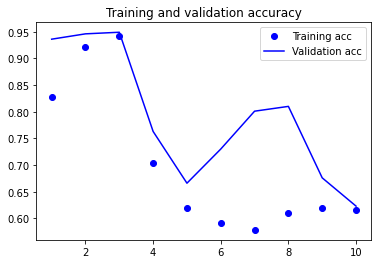

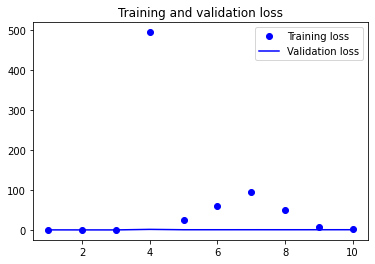

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 3.5 Confusion Matrix and Classificaiton Report

In [ ]:
class_train_preds = model3.predict(x_train)
threshold = Find_Optimal_Cutoff(y_train, class_train_preds)

pre_trained_prob = model.predict_proba(x_val)

In [ ]:
i=0  
pre_trained_preds_class =np.empty(pre_trained_prob.shape)
while i < len(pre_trained_prob):
    if(pre_trained_prob[i]<=threshold):
        pre_trained_preds_class[i]=0
    else:
        pre_trained_preds_class[i]=1
    i+=1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('the classification Report for LSTM model is:')
print(classification_report(y_val, pre_trained_preds_class ))
print('the confusion matrix for LSTM model is:' )
print(confusion_matrix(y_val, pre_trained_preds_class))

the classification Report for LSTM model is:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       504
           1       0.99      0.98      0.99       496

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

the confusion matrix for LSTM model is:
[[498   6]
 [  8 488]]


## Part III: Analysis

* Because bidirecitonal can learn the text sequence forward and backward, I use bidirectional LSTM to be the simple architecture to build the model. It performed well, the accuracy reached 0.95. 

* Then I added all the stacked layers: Conv1D, MaxPool1D,  GRU, and Dropout. The performance plot tend to be more plateaued comparing with only the bidirectional LSTM.

* Next I added the pre-computed embeddings into all the stacked layers. The performance didn't change much since the second model has already reached the 0.99 accuracy. But it's true that the model will still improve after including the pre-computed embeddings. 

* I also changed the maxlen, which is the max words for each text, the result get improved after I increased the maxlen.

* The original text includes URL and stopwords. The model result will improve after we removed them. 

* Although adding dropouts can slow down the model to learn training set, it can help to generalize the model performance in the validation set. 

* The classification report will look better after we found the optimal threshold. 

* Tuning the hyperparameters such as the learning_rate of optimizer, batch_size, epoch, decay_rate, number of neural network's layer, nodes can also help to improve the models. 

* It's interesting to comparing with the traditional text preprocessing method(Bag of Words, TF-IDF) and word embedding method among these models in the furture.

* We could try more advanced method such as word2vec, cbow, and skip-gram to see if there's any improvement. 